13.856152086062343 [ 0  0  1  1  1  1  0  3  3  3  1  2 14 14] 13 1.0658578527740263
9.07608073431455 [ 0  1  1  1  1  2  0  5  1  1  2  0  8 10] 12 0.7563400611928791
14.51531127435233 [ 0  1  1  1  1  4  0  5  1  2  5  6 16 14] 15 0.9676874182901554
15.451743044085083 [ 0  1  1  1  1  1  0  4  3  5  5  3 14 15] 16 0.9657339402553177
11.835598788616052 [ 1  1  1  1  1  2  0  4  2  3  4 12 12 12] 11 1.0759635262378229
10.12043704451156 [ 1  0  1  1  1  2  0  4  1  1  4 14 12 10] 11 0.9200397313192327
14.97906362594662 [ 0  0  1  1  2  3  0  3  2  3  2  0 16 15] 15 0.9986042417297747
8.049665228051373 [ 0  1  1  0  2  4  0  4  1  1  4  0 10  9] 0 8.049665228051373
3.3809460799436923 [0 1 1 1 3 1 2 3 2 4 2 0 6 5] 0 3.3809460799436923
8.064152128354438 [0 1 1 1 2 1 1 4 1 2 5 2 7 9] 8 1.0080190160443048
12.059284067404278 [ 1  0  1  0  1  2  1  4  1  3  5  0 14 12] 12 1.0049403389503564
10.908786423292586 [ 0  1  1  1  1  2  0  5  1  1  5  4 11 11] 11 0.9917078566629624
3.6501922775529216 

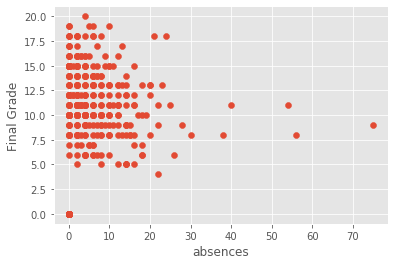

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

# file_handler = open("student-mat.csv", "r")
# st = pd.read_csv(file_handler, sep=';')
# file_handler.close()

st = pd.read_csv("student-mat.csv", sep=';')

school = {'GP': 0,'MS': 1}

st.school = [school[item] for item in st.school]

sex = {'M': 0,'F': 1}

st.sex = [sex[item] for item in st.sex]

romantic = {'no': 0,'yes': 1}
 
st.romantic = [romantic[item] for item in st.romantic] 

schoolsup = {'no': 0,'yes': 1}

st.schoolsup = [schoolsup[item] for item in st.schoolsup]

famsup = {'no': 0,'yes': 1}

st.famsup = [famsup[item] for item in st.famsup] 

paid = {'no': 0,'yes': 1}

st.paid = [paid[item] for item in st.paid] 

activities = {'no': 0,'yes': 1}

st.activities = [activities[item] for item in st.activities] 

higher = {'no': 0,'yes': 1}

st.higher = [higher[item] for item in st.higher] 

internet = {'no': 0,'yes': 1}

st.internet = [internet[item] for item in st.internet]

X = np.array(st[['romantic','activities','higher','internet','traveltime','studytime','failures'
       ,'famrel','Dalc','Walc','health','absences','G1','G2']])

y = np.array(st['G3'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)



# best = 0;

# for _ in range(100):
#     X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

#     model = linear_model.LinearRegression()

#     model.fit(X_train, y_train)

#     prediction = model.score(X_test, y_test)
#     print(prediction)

#     if prediction > best:
#         best = prediction
#         with open("stmodel.pickle", "wb") as f:
#             pickle.dump(model, f)
    

# print(best)
pickle_in = open("stmodel.pickle", "rb")
model = pickle.load(pickle_in)

records = model.predict(X_test)

for i in range(len(records)):
    n = records[i]
    if y_test[i] > 0:
        n = records[i]/y_test[i]
    print(records[i], X_test[i], y_test[i],n)
    
    

    
style.use("ggplot")
p = 'absences'
pyplot.scatter(st[p],st['G3'])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()